In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

data = pd.read_csv(r'breast-cancer-wisconsin.data.txt')

In [4]:
df=data.copy()

In [6]:
df.shape

(698, 11)

In [8]:
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [9]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [10]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [12]:
df.drop('Id',axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              698 non-null    int64 
 1   Uniformity_Cell_Size         698 non-null    int64 
 2   Uniformity_Cell_Shape        698 non-null    int64 
 3   Marginal_Adhesion            698 non-null    int64 
 4   Single_Epithelial_Cell_Size  698 non-null    int64 
 5   Bare_Nuclei                  698 non-null    object
 6   Bland_Chromatin              698 non-null    int64 
 7   Normal_Nucleoli              698 non-null    int64 
 8   Mitoses                      698 non-null    int64 
 9   Class                        698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [15]:
df.dtypes

Clump_thickness                 int64
Uniformity_Cell_Size            int64
Uniformity_Cell_Shape           int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [16]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [18]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [19]:
df['Bare_Nuclei'].unique()

array([10.,  2.,  4.,  1.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [21]:
df['Class'].value_counts()

2    457
4    241
Name: Class, dtype: int64

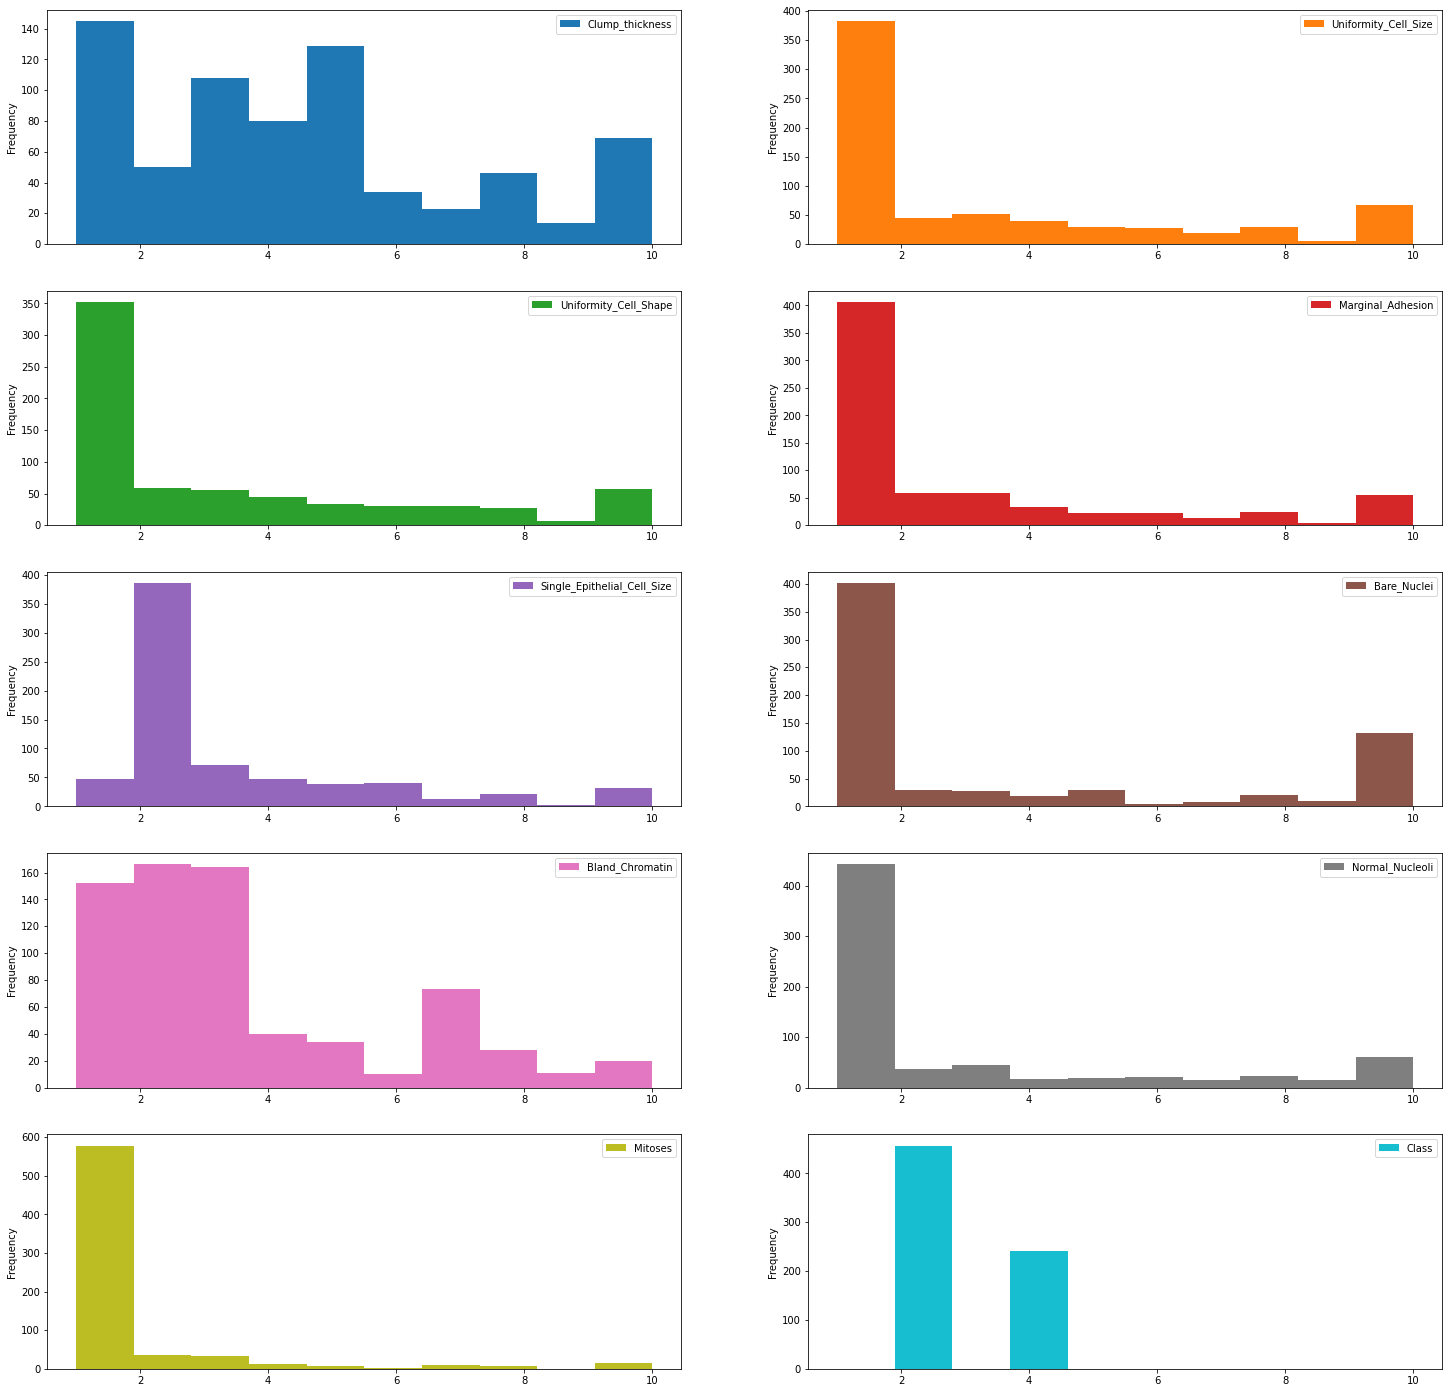

In [25]:
plt.rcParams['figure.figsize']=(25,25)
df.plot(kind='hist',bins=10, subplots=True,layout=(5,2),sharex=False,sharey=False)
plt.show()

In [26]:
correlation= df.corr()

In [27]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822563
Uniformity_Cell_Shape          0.818794
Uniformity_Cell_Size           0.817772
Bland_Chromatin                0.756732
Clump_thickness                0.716509
Normal_Nucleoli                0.712067
Marginal_Adhesion              0.696605
Single_Epithelial_Cell_Size    0.682618
Mitoses                        0.423008
Name: Class, dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'set_xticklables'

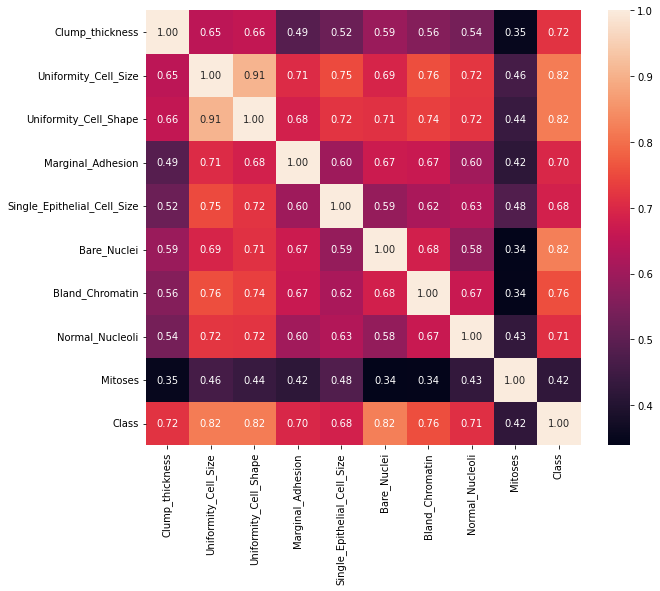

In [28]:
plt.figure(figsize=(10,8))
plt.title='correlation entre les attribus et la class'
a= sns.heatmap(correlation ,square=True , annot=True,fmt='.2f',linecolor='white')
a.set_xticklables(a.get_xtickelabels(), rotation=90)
a.set_yticklables(a.get_ytickelabels(), rotation=90)
plt.show()

In [29]:
x= df.drop(['Class'],axis=1)
y=df['Class']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
x_train.shape


(558, 9)

In [36]:
x_test.shape

(140, 9)

In [37]:
y_test.shape

(140,)

In [39]:
y_train.shape

(558,)

In [40]:
x_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    15
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [41]:
x_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    1
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [42]:
for df1 in  [x_train , x_test]:
    for col in x_train.columns:
        col_median=x_train[col].median()
        df1[col].fillna(col_median,inplace= True)

In [43]:
x_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [44]:
x_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [45]:
x_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
62,6,3,4,1,5,2.0,3,9,1
193,3,1,1,1,2,1.0,3,1,1
263,7,9,4,10,10,3.0,5,3,3
222,7,5,6,3,3,8.0,7,4,1
140,2,1,1,1,2,1.0,1,1,1


In [46]:
x_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
603,5,3,2,8,5,10.0,8,1,2
619,3,1,1,1,2,1.0,2,1,1
452,4,5,5,8,6,10.0,10,7,1
85,3,3,6,4,5,8.0,4,4,1
416,1,1,1,1,2,1.0,2,1,1


In [47]:
col=x_train.columns

In [48]:
from sklearn.preprocessing import  StandardScaler
 
scaler = StandardScaler()

In [49]:
x_train= scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [50]:
x_train=pd.DataFrame(x_train,columns=[col])
x_test = pd.DataFrame(x_test, columns=[col])

In [51]:
x_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.574621,-0.040143,0.277515,-0.629622,0.775913,-0.384119,-0.171342,1.983330,-0.333601
1,-0.497748,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-0.171342,-0.601658,-0.333601
2,0.932077,1.879857,0.277515,2.541854,2.984890,-0.107196,0.660039,0.044589,0.859663
3,0.932077,0.599857,0.943552,0.075150,-0.107678,1.277420,1.491419,0.367712,-0.333601
4,-0.855205,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-1.002722,-0.601658,-0.333601


In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier(n_neighbors=3)

In [55]:
y_pred=knn.predict(x_test)

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [57]:
y_pred
#2 is for probability of benign cancer and 4 is for probability of malignant cancer.

array([4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 4], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score

In [60]:
print('model accuracy is ' ,accuracy_score(y_test,y_pred))

model accuracy is  0.9714285714285714


In [84]:
from sklearn.metrics import f1_score, precision_score,recall_score

f1=f1_score(y_test,y_pred,average='micro')
print(f1)

0.9714285714285714


In [83]:
pr=precision_score(y_test,y_pred,average='micro')
print(pr)

0.9714285714285714


In [86]:
rl=recall_score(y_test,y_pred,average='micro')
print(rl)

0.9714285714285714


In [61]:
from sklearn.metrics import confusion_matrix

In [73]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[83  2]
 [ 2 53]]


In [65]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


In [75]:
from sklearn.metrics import classification_report
cp=classification_report(y_test,y_pred,)
print(cp)

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        85
           4       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

